In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
coad_ff_path = '/mnt/c/Users/donna/Downloads/Thesis/data/ilovetesting/04-15_10-29_all_coad'
brca_ff_path = '/mnt/c/Users/donna/Downloads/Thesis/data/ilovetesting/04-15_10-32_all_brca'
peak_names = pd.read_csv('/mnt/c/Users/donna/Downloads/Thesis/brca_correlaties/TCGA_data/filtered_peak_names.csv', header=None).values

In [3]:
ff_feature = 'cov_x'

In [5]:
coad_file_names = [f for f in os.listdir(coad_ff_path) if f.endswith(".csv")]
brca_file_names = [f for f in os.listdir(brca_ff_path) if f.endswith(".csv")]

ff_list = []  # ← moved outside the loop

for ff_file in coad_file_names:
    cf_file_path = os.path.join(coad_ff_path, ff_file)
    new_column = pd.read_csv(cf_file_path, header=0, dtype='object', usecols=[ff_feature])
    new_column = new_column.astype(float).values.flatten()
    ff_list.append(new_column)

for ff_file in brca_file_names:
    cf_file_path = os.path.join(brca_ff_path, ff_file)
    new_column = pd.read_csv(cf_file_path, header=0, dtype='object', usecols=[ff_feature])
    new_column = new_column.astype(float).values.flatten()
    ff_list.append(new_column)    

# Now stack all at once
ff_matrix = None
ff_matrix = np.stack(ff_list)

In [6]:
peak_var = np.empty((len(peak_names), 2), dtype=object)
peak_var[:, 0] = peak_names.flatten()

In [7]:
for i in range(len(peak_var)):
    peak_var[i, 1] = np.var(ff_matrix[:, i])

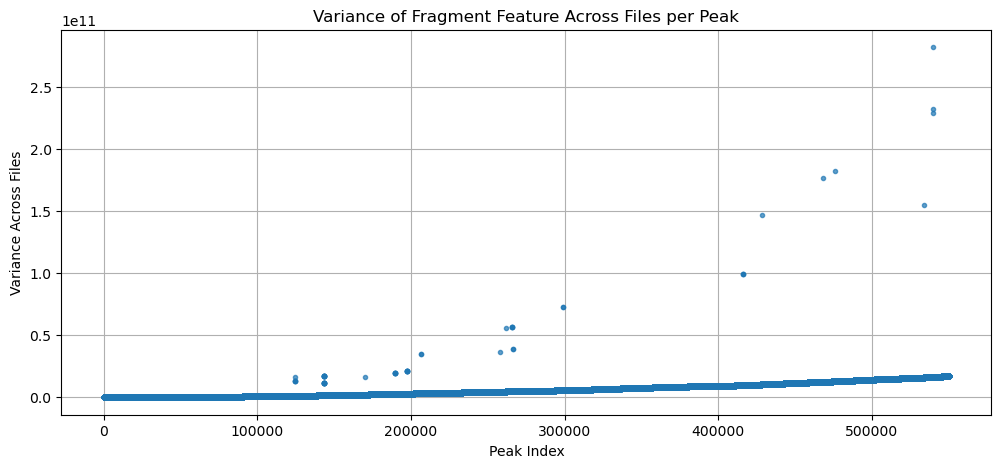

In [35]:
variances = peak_var[:, 1].astype(float)
plt.figure(figsize=(12, 5))
plt.plot(variances, marker='.', linestyle='None', alpha=0.7)
plt.xlabel("Peak Index")
plt.ylabel("Variance Across Files")
plt.title("Variance of Fragment Feature Across Files per Peak")
plt.grid(True)

In [ ]:
ff_file = pd.read_csv('/mnt/c/Users/donna/Downloads/Thesis/TSSClassification/results/03-26_21-16_3_coad/coad_full_bams--EE87867.hg38.frag.tsv_corrected.bam_fragment_features.csv')
ff_list = ff_file.columns.tolist()

In [ ]:
def frag_var(ff_path, peak_names, ff_list):
    results = {}
    file_names = [f for f in os.listdir(ff_path) if f.endswith(".csv")]

    # Loop over fragment features once
    for ff in ff_list:
        # Read in data from all files for this feature
        ff_data = []
        for ff_file in file_names:
            cf_file_path = os.path.join(ff_path, ff_file)
            new_column = pd.read_csv(cf_file_path, usecols=[ff])
            ff_data.append(new_column.values.flatten())

        # Stack into matrix: shape = (num_files, num_peaks)
        ff_matrix = np.stack(ff_data, axis=0)

        # Compute variance per peak (across files)
        variances = np.var(ff_matrix, axis=0)  # shape: (num_peaks,)

        # Compute mean variance across peaks
        mean_var = np.mean(variances)

        results[ff] = mean_var

    # Convert to DataFrame
    result_df = pd.DataFrame(results.items(), columns=["Fragment_Feature", "Mean_Variance"])
    return result_df


In [26]:
mean_vars = frag_var(ff_path, peak_names, ff_list)

In [27]:
print(mean_vars)

                Fragment_Feature  Mean_Variance
0                     Unnamed: 0   0.000000e+00
1                           fslr   1.144346e-01
2                          short   1.252687e+01
3                           long   1.676003e+01
4                            all   3.203172e+01
5                            mad   2.209482e+00
6                             cv   1.995233e-04
7                           mapq   2.213098e-01
8                       mapq_std   1.208845e+00
9                     cov_spread   2.511454e-05
10                         cov_x   6.002837e+09
11                cov_spread_tss   2.505052e-05
12                     cov_x_tss   6.804520e+09
13         mean_central_coverage   3.031597e-05
14          mean_window_coverage   1.044670e-06
15         mean_outside_coverage   6.367380e-08
16                  griffin_mean   4.568291e-06
17               max_wave_height   7.560016e-05
18  savgol_mean_central_coverage   3.164487e-05
19   savgol_mean_window_coverage   1.044

In [8]:
peak_var_df = pd.DataFrame(peak_var)
top_peaks = peak_var_df.sort_values(by=peak_var_df.columns[1], ascending=False).head(10000)
high_var_peaks = top_peaks.values[:,0]

In [10]:
print(len(high_var_peaks))

10000


In [11]:
np.savetxt('/mnt/c/Users/donna/Downloads/Thesis/brca_correlaties/high_var_covx_peaks.csv', high_var_peaks, delimiter=",", fmt="%s")